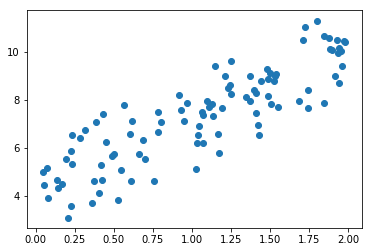

In [4]:
# Exploring the Normal Equation (closed-form solution for linear regression)
# theta_hat = (X_T . X)^-1 . X_T . y

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# equation is y = 4 + 3x + <noise>

plt.scatter(X, y)

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance to account for theta0 bias term
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.30087453],
       [2.86634149]])

In [7]:
# Make predictions based on the theta_best we found with the closed-form solution

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

y_predict

array([[ 4.30087453],
       [10.03355752]])

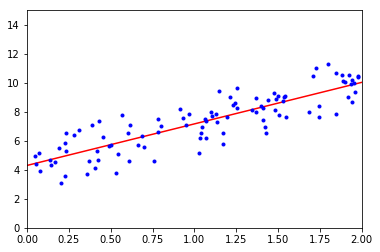

In [8]:
# Plot this model's predictions

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
# Scikit-Learn equivalent

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

print(lin_reg.predict(X_new))

[4.30087453] [[2.86634149]]
[[ 4.30087453]
 [10.03355752]]
